In [1]:
!pip install cobra
!pip install matplotlib
!pip install matplotlib-venn
!pip install seaborn
!pip install ipympl


In [2]:
import pandas as pd 
import math
import sys

import numpy as np
from scipy.stats import ttest_ind
import cobra
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib.widgets import CheckButtons

source_dir = 'src'
sys.path.append(source_dir)

from transcriptomics.get_gene_transcript_dictionary import get_gene_transcript_dictionary
from transcriptomics.get_reaction_transcript_dictionary import get_reaction_transcript_dictionary

In [3]:
fpkm_df = pd.read_csv("fpkm_counts_with_annotations.csv")


In [4]:
fpkm_df.head()

,Geneid,EBY_1,EBY_2,EBY_3,EBY-U_1,EBY-GNSR_1,EBY-GNSR_2,EBY-GNHR_1,EBY-GNHR_2,EBY-GNHR_3,EBY-GNUR_1,EBY-GNUR_2,EBY-GNUR_3,JGI_annotation,KEGG_annotation
0,jgi|Sacce1|1000|YDL018C,47.55,49.28,46.03,27.44,66.92,56.75,26.36,30.20,32.08,45.72,44.23,46.24,NaN,no KO assigned | (RefSeq) ERP3; Erp3p
1,jgi|Sacce1|1001|YDL017W,20.11,20.75,19.72,26.48,25.70,28.76,22.21,20.59,22.80,33.20,36.83,33.11,Protein kinase,K02214 cell division control protein 7 [EC:2.7...
2,jgi|Sacce1|1002|YDL016C,5.68,6.50,3.91,4.32,7.41,7.81,2.39,2.12,2.39,5.77,2.15,3.29,NaN,NaN
3,jgi|Sacce1|1003|YDL015C,258.04,263.32,271.20,176.40,287.94,309.80,97.96,133.22,114.73,172.79,189.77,190.81,3-oxo-5-alpha-steroid 4-dehydrogenase,K10258 very-long-chain enoyl-CoA reductase [EC...
4,jgi|Sacce1|1004|YDL014W,338.89,352.15,227.14,32.43,264.66,275.53,33.94,28.27,20.38,70.73,106.82,72.10,NaN,K14563 rRNA 2'-O-methyltransferase fibrillarin...


In [5]:


fpkm_df.head()

,Geneid,EBY_1,EBY_2,EBY_3,EBY-U_1,EBY-GNSR_1,EBY-GNSR_2,EBY-GNHR_1,EBY-GNHR_2,EBY-GNHR_3,EBY-GNUR_1,EBY-GNUR_2,EBY-GNUR_3,JGI_annotation,KEGG_annotation
0,jgi|Sacce1|1000|YDL018C,47.55,49.28,46.03,27.44,66.92,56.75,26.36,30.20,32.08,45.72,44.23,46.24,NaN,no KO assigned | (RefSeq) ERP3; Erp3p
1,jgi|Sacce1|1001|YDL017W,20.11,20.75,19.72,26.48,25.70,28.76,22.21,20.59,22.80,33.20,36.83,33.11,Protein kinase,K02214 cell division control protein 7 [EC:2.7...
2,jgi|Sacce1|1002|YDL016C,5.68,6.50,3.91,4.32,7.41,7.81,2.39,2.12,2.39,5.77,2.15,3.29,NaN,NaN
3,jgi|Sacce1|1003|YDL015C,258.04,263.32,271.20,176.40,287.94,309.80,97.96,133.22,114.73,172.79,189.77,190.81,3-oxo-5-alpha-steroid 4-dehydrogenase,K10258 very-long-chain enoyl-CoA reductase [EC...
4,jgi|Sacce1|1004|YDL014W,338.89,352.15,227.14,32.43,264.66,275.53,33.94,28.27,20.38,70.73,106.82,72.10,NaN,K14563 rRNA 2'-O-methyltransferase fibrillarin...


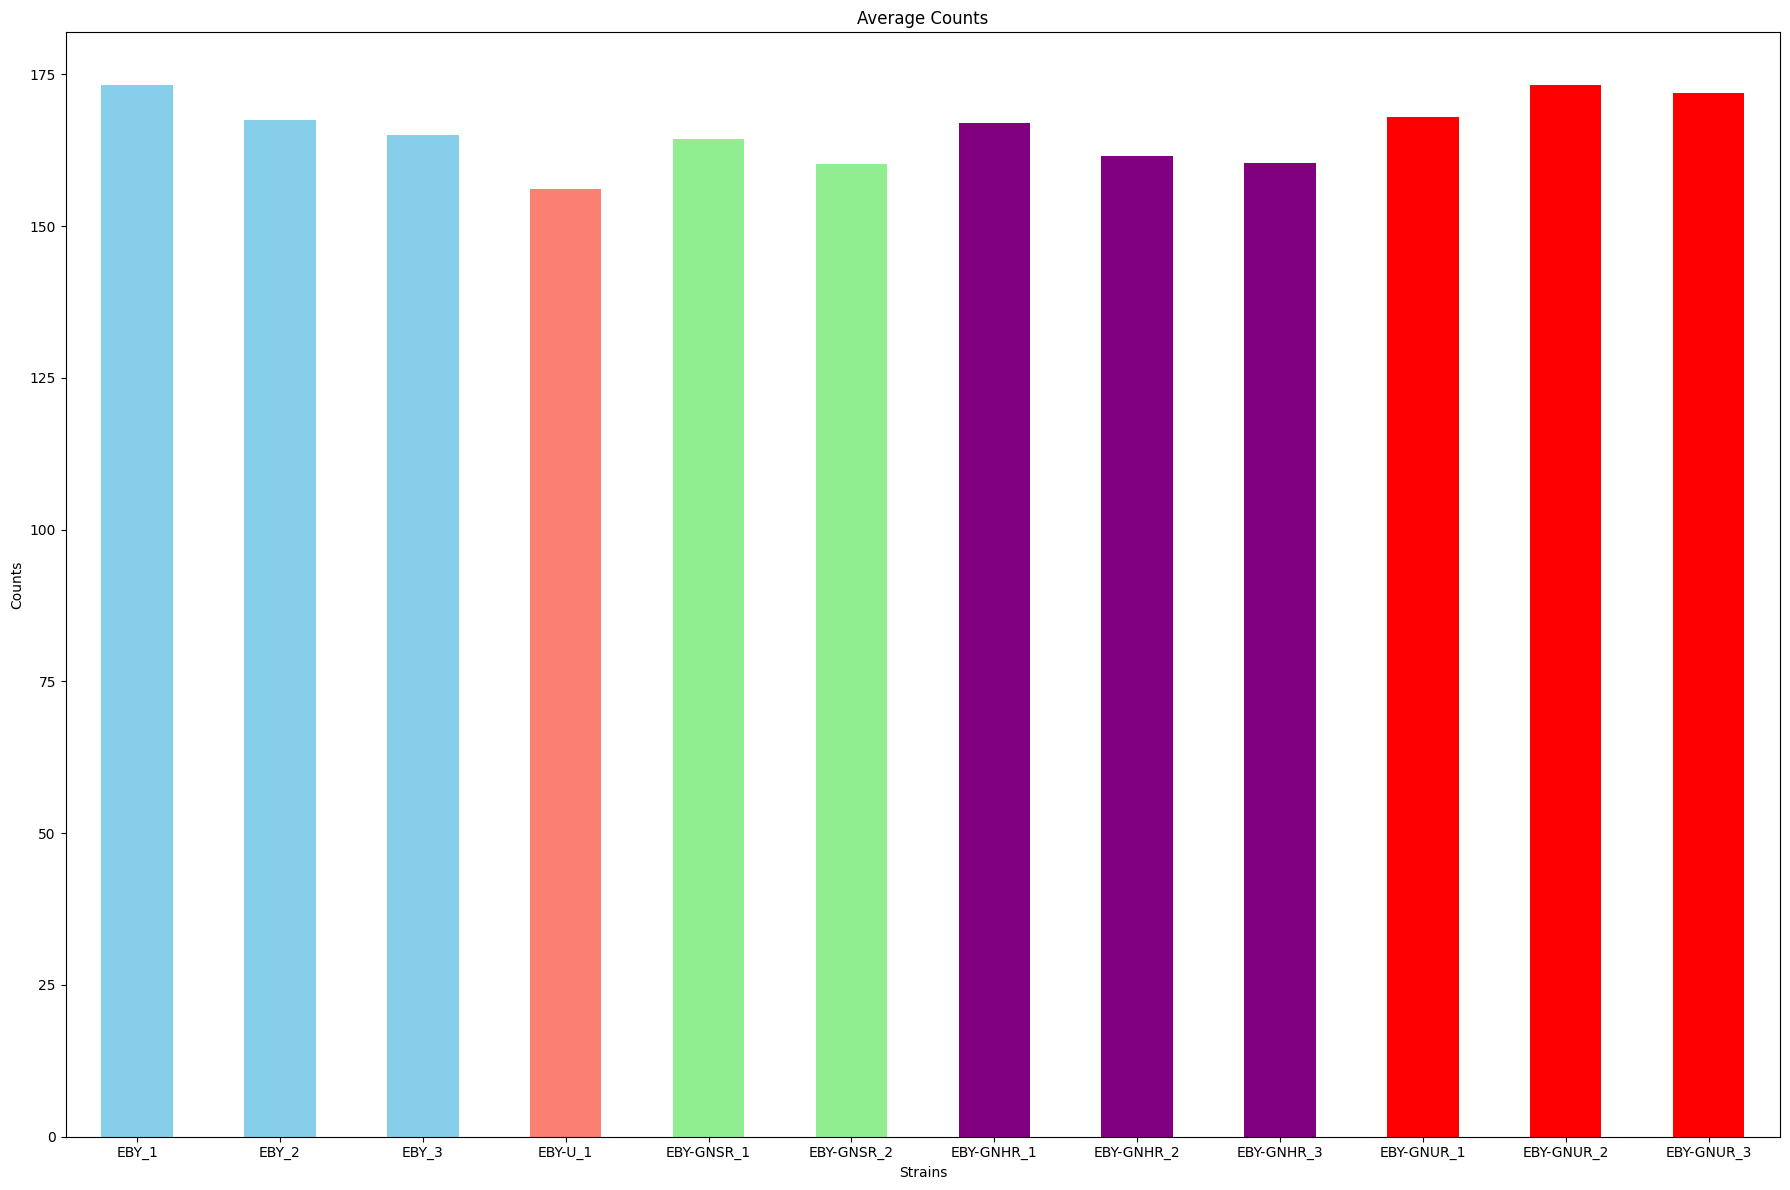

In [6]:
column = fpkm_df.drop(columns='JGI_annotation')
column2 = column.drop(columns='KEGG_annotation')
column3 = column2.drop(columns='Geneid')
column_averages = column3.mean()
column_averages.plot(kind='bar', figsize=(18, 12), color=['skyblue','skyblue','skyblue', 'salmon', 'lightgreen','lightgreen','purple','purple','purple','red','red','red'])

# 3. Add a title and labels for clarity
plt.title('Average Counts')
plt.ylabel('Counts')
plt.xlabel('Strains')
plt.xticks(rotation=0) # Keeps the x-axis labels horizontal
plt.tight_layout() # Adjusts plot for a tight layout

# 4. Display the plot
plt.show()

In [7]:
fpkm_df.head()

,Geneid,EBY_1,EBY_2,EBY_3,EBY-U_1,EBY-GNSR_1,EBY-GNSR_2,EBY-GNHR_1,EBY-GNHR_2,EBY-GNHR_3,EBY-GNUR_1,EBY-GNUR_2,EBY-GNUR_3,JGI_annotation,KEGG_annotation
0,jgi|Sacce1|1000|YDL018C,47.55,49.28,46.03,27.44,66.92,56.75,26.36,30.20,32.08,45.72,44.23,46.24,NaN,no KO assigned | (RefSeq) ERP3; Erp3p
1,jgi|Sacce1|1001|YDL017W,20.11,20.75,19.72,26.48,25.70,28.76,22.21,20.59,22.80,33.20,36.83,33.11,Protein kinase,K02214 cell division control protein 7 [EC:2.7...
2,jgi|Sacce1|1002|YDL016C,5.68,6.50,3.91,4.32,7.41,7.81,2.39,2.12,2.39,5.77,2.15,3.29,NaN,NaN
3,jgi|Sacce1|1003|YDL015C,258.04,263.32,271.20,176.40,287.94,309.80,97.96,133.22,114.73,172.79,189.77,190.81,3-oxo-5-alpha-steroid 4-dehydrogenase,K10258 very-long-chain enoyl-CoA reductase [EC...
4,jgi|Sacce1|1004|YDL014W,338.89,352.15,227.14,32.43,264.66,275.53,33.94,28.27,20.38,70.73,106.82,72.10,NaN,K14563 rRNA 2'-O-methyltransferase fibrillarin...


In [8]:
EBY_AVE = fpkm_df[['EBY_1', 'EBY_2', 'EBY_3']].mean(axis=1) # averages the 3 EBY columns
EBYU = fpkm_df[['EBY-U_1']].mean(axis=1) # puts the EBY-U_1 in the same shape as EBY_AVE
EBY_GNSR_AVE = fpkm_df[['EBY-GNSR_1', 'EBY-GNSR_2']].mean(axis=1) # averages 2 GNSR columns
EBY_GNHR_AVE = fpkm_df[['EBY-GNHR_1', 'EBY-GNHR_2', 'EBY-GNHR_3']].mean(axis=1) # averages 3 GNHR columns
EBY_GNUR_AVE = fpkm_df[['EBY-GNUR_1', 'EBY-GNUR_2', 'EBY-GNUR_3']].mean(axis=1) # averages 3 GNUR columns


def calculate_log2fc(treatment_series, control_series, pseudocount=1): # log2fold change function
    """Calculates log2 fold change between two pandas Series."""
    treatment_adjusted = treatment_series + pseudocount
    control_adjusted = control_series + pseudocount
    return np.log2(treatment_adjusted / control_adjusted) 

In [9]:
# Comparison 1: GNSR vs. GNHR
log2fc_gnsr_vs_gnhr = calculate_log2fc(EBY_GNSR_AVE, EBY_GNHR_AVE)

# Comparison 2: GNSR vs. GNUR
log2fc_gnsr_vs_gnur = calculate_log2fc(EBY_GNSR_AVE, EBY_GNUR_AVE)

# Comparison 3: GNSR vs. EBY
log2fc_gnsr_vs_eby = calculate_log2fc(EBY_GNSR_AVE, EBY_AVE)

# Comparison 4: GNUR vs. U
log2fc_gnur_vs_u = calculate_log2fc(EBY_GNUR_AVE, EBYU)

results_df = pd.DataFrame({
    'log2fc_GNSR_vs_GNHR': log2fc_gnsr_vs_gnhr,
    'log2fc_GNSR_vs_GNUR': log2fc_gnsr_vs_gnur,
    'log2fc_GNSR_vs_EBY': log2fc_gnsr_vs_eby,
    'log2fc_GNUR_vs_U': log2fc_gnur_vs_u
})

# Display the first few rows of results
print(results_df.head())

   log2fc_GNSR_vs_GNHR  log2fc_GNSR_vs_GNUR  log2fc_GNSR_vs_EBY  \
0             1.040553             0.437547            0.370018   
1             0.303983            -0.325705            0.413619   
2             1.383547             0.862141            0.436231   
3             1.366445             0.693255            0.177329   
4             3.248247             1.686621           -0.179722   

   log2fc_GNUR_vs_U  
0          0.706100  
1          0.364552  
2         -0.167554  
3          0.064076  
4          1.332962  


In [10]:
gnsr_cols = ['EBY-GNSR_1', 'EBY-GNSR_2']
eby_cols = ['EBY_1', 'EBY_2', 'EBY_3']
gnhr_cols = ['EBY-GNHR_1', 'EBY-GNHR_2', 'EBY-GNHR_3']
gnur_cols = ['EBY-GNUR_1', 'EBY-GNUR_2', 'EBY-GNUR_3']

# Perform an independent t-test for each row (gene)
# The 'equal_var=False' handles cases where the groups have different variances
# The '.pvalue' at the end extracts just the p-value from the test result
p_values_gnsr_vs_gnhr = stats.ttest_ind(
    fpkm_df[gnsr_cols],
    fpkm_df[gnhr_cols],
    axis=1,
    equal_var=False
).pvalue

p_values_gnsr_vs_gnur = stats.ttest_ind(
    fpkm_df[gnsr_cols],
    fpkm_df[gnur_cols],
    axis=1,
    equal_var=False
).pvalue

p_values_gnsr_vs_eby = stats.ttest_ind(
    fpkm_df[gnsr_cols],
    fpkm_df[eby_cols],
    axis=1,
    equal_var=False
).pvalue

p_values_gnur_vs_u = stats.ttest_ind(
    fpkm_df[gnur_cols],
    fpkm_df['EBY-U_1'],
    axis=1,
    equal_var=False
).pvalue


/workspaces/SUMO_seq_project/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/workspaces/SUMO_seq_project/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/workspaces/SUMO_seq_project/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


In [11]:
# Create a DataFrame for the first comparison
df1 = pd.DataFrame({
    'log2_fold_change': log2fc_gnsr_vs_gnhr,
    'p_value': p_values_gnsr_vs_gnhr, # The p-values you just calculated
    'comparison': 'GNSR vs. GNHR'
})

# Create a DataFrame for the second comparison
df2 = pd.DataFrame({
    'log2_fold_change': log2fc_gnsr_vs_gnur,
    'p_value': p_values_gnsr_vs_gnur, # The p-values you just calculated
    'comparison': 'GNSR vs. GNUR'
})

# Create a DataFrame for the third comparison
df3= pd.DataFrame({
    'log2_fold_change': log2fc_gnsr_vs_eby,
    'p_value': p_values_gnsr_vs_eby, # The p-values you just calculated
    'comparison': 'GNSR vs. EBY'
})

# Create a DataFrame for the first comparison
df4 = pd.DataFrame({
    'log2_fold_change': log2fc_gnsr_vs_gnhr,
    'p_value': p_values_gnur_vs_u, # The p-values you just calculated
    'comparison': 'GNUR vs. U'
})

plot_df = pd.concat([df1, df2, df3, df4]).reset_index(drop=True) # combining into one dataframe

plot_df['-log10(p_value)'] = -np.log10(plot_df['p_value'].fillna(1))


/workspaces/SUMO_seq_project/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
plot_df.head()

,log2_fold_change,p_value,comparison,-log10(p_value)
0,1.040553,0.073900,GNSR vs. GNHR,1.131358
1,0.303983,0.133726,GNSR vs. GNHR,0.873785
2,1.383547,0.007939,GNSR vs. GNHR,2.100257
3,1.366445,0.002520,GNSR vs. GNHR,2.598541
4,3.248247,0.000677,GNSR vs. GNHR,3.169231


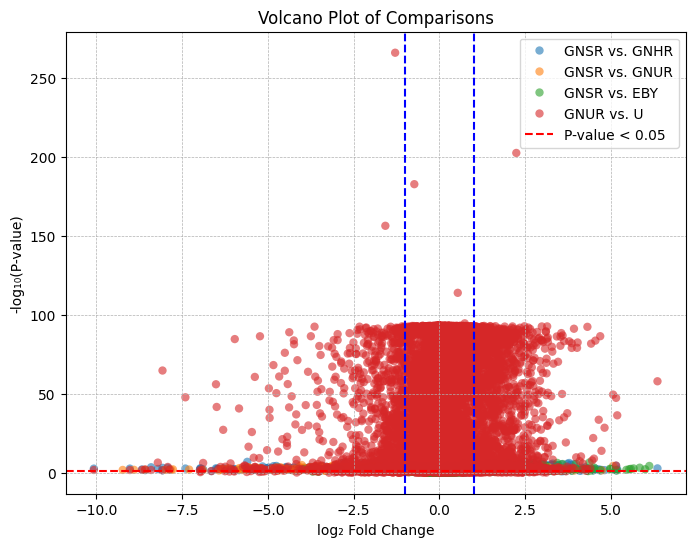

In [13]:
plt.figure(figsize=(8, 6))

# Use Seaborn's scatterplot, coloring by the 'comparison' column
sns.scatterplot(
    data=plot_df,
    x='log2_fold_change',
    y='-log10(p_value)',
    hue='comparison', # This will color the dots for each comparison group
    alpha=0.6,
    edgecolor='none'
)

# Add lines for significance and fold-change cutoffs (optional)
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--', label='P-value < 0.05')
plt.axvline(x=1, color='b', linestyle='--')
plt.axvline(x=-1, color='b', linestyle='--')

# Customize labels and title
plt.xlabel("log₂ Fold Change")
plt.ylabel("-log₁₀(P-value)")
plt.title("Volcano Plot of Comparisons")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

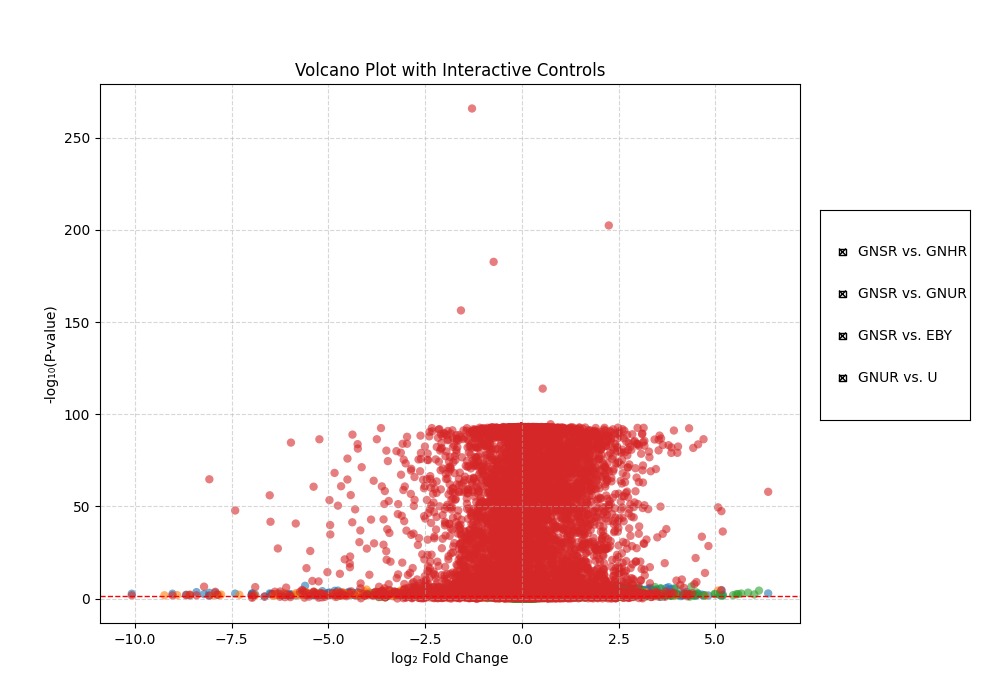

In [16]:
%matplotlib widget

fig, ax = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(left=0.1, right=0.8)

lines = {} # Dictionary to store plot artists
for group_name in plot_df['comparison'].unique():
    group_df = plot_df[plot_df['comparison'] == group_name]
    # Use ax.scatter() to plot the data
    line = ax.scatter(
        group_df['log2_fold_change'],
        group_df['-log10(p_value)'],
        label=group_name,
        alpha=0.6,
        edgecolor='none'
    )
    lines[group_name] = line

# Add labels and styling to the main plot
ax.set_xlabel("log₂ Fold Change")
ax.set_ylabel("-log₁₀(P-value)")
ax.set_title("Volcano Plot with Interactive Controls")
ax.grid(True, linestyle='--', alpha=0.5)
ax.axhline(y=-np.log10(0.05), color='r', linestyle='--', lw=1)


# 3. CREATE THE CHECKBUTTON WIDGET
# Define the area where the buttons will live (right side of the plot)
rax = plt.axes([0.82, 0.4, 0.15, 0.3]) # [left, bottom, width, height]

labels = [str(line.get_label()) for line in lines.values()]
visibility = [line.get_visible() for line in lines.values()]
check = CheckButtons(rax, labels, visibility)

# 4. DEFINE THE FUNCTION TO BE CALLED ON BUTTON CLICK
def update_visibility(label):
    """This function will turn the visibility of a plot line on or off."""
    line = lines[label]
    line.set_visible(not line.get_visible())
    plt.draw() # Redraw the plot to show the change

# 5. CONNECT THE WIDGET TO THE FUNCTION
check.on_clicked(update_visibility)

plt.show()

In [15]:
EBY_1_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY_1')
EBY_2_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY_2')
EBY_3_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY_3')

EBY_U_1_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-U_1')

EBY_GNSR_1_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNSR_1')
EBY_GNSR_2_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNSR_2')

EBY_GNHR_1_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNHR_1')
EBY_GNHR_2_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNHR_2')
EBY_GNHR_3_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNHR_3')

EBY_GNUR_1_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNUR_1')
EBY_GNUR_2_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNUR_2')
EBY_GNUR_3_gene_transcripts = get_gene_transcript_dictionary(fpkm_df, 'EBY-GNUR_3')


EBY_1_gene_transcripts

{'': inf,
 'no KO assigned | (RefSeq) ERP3; Erp3p': 47.55,
 'K02214 cell division control protein 7 [EC:2.7.11.1] | (RefSeq) CDC7, LSD6, SAS1; serine/threonine protein kinase CDC7': 20.11,
 nan: 0.92,
 'K10258 very-long-chain enoyl-CoA reductase [EC:1.3.1.93] | (RefSeq) TSC13; trans-2-enoyl-CoA reductase (NADPH) TSC13': 258.04,
 "K14563 rRNA 2'-O-methyltransferase fibrillarin [EC:2.1.1.-] | (RefSeq) NOP1, LOT3; rRNA methyltransferase NOP1": 338.89,
 'K22645 E3 ubiquitin-protein ligase complex SLX5-SLX8 subunit SLX5 [EC:2.3.2.27] | (RefSeq) SLX5, HEX3, ULS2; SUMO-targeted ubiquitin ligase complex subunit SLX5': 25.82,
 'no KO assigned | (RefSeq) uncharacterized protein': 0.4,
 'no KO assigned | (RefSeq) GRX6; glutathione-disulfide reductase GRX6': 64.59,
 'K03358 anaphase-promoting complex subunit 11 | (RefSeq) APC11; anaphase promoting complex subunit 11': 64.2,
 'K03062 26S proteasome regulatory subunit T2 | (RefSeq) RPT2, YHS4, YTA5; proteasome regulatory particle base subunit RPT2':